In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.sans-serif'] = ['SimHei']  # 显示中文
plt.rcParams['axes.unicode_minus'] = False  # 显示负号

In [2]:
data_g = pd.read_csv('./gas_deal.csv')
data_g.head()

,id,cd,baseprice,basenum,contprice,dealnum,trans-amount,orderdate,jsd
0,34577,1,4550,20.0,4550.0,20.0,91000.0,2018/11/23,中海油宁波江浙沪皖
1,34578,3,4800,1100.0,4800.0,1100.0,5280000.0,2018/11/23,珠三角地区
2,34579,3,4800,11500.0,4800.0,11500.0,55200000.0,2018/11/23,珠三角地区
3,34580,3,4800,600.0,4800.0,600.0,2880000.0,2018/11/23,珠三角地区
4,34581,3,4800,1100.0,4800.0,1100.0,5280000.0,2018/11/23,珠三角地区


In [3]:
data_g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8705 entries, 0 to 8704
Data columns (total 9 columns):
id              8705 non-null int64
cd              8705 non-null int64
baseprice       8705 non-null int64
basenum         8705 non-null float64
contprice       8705 non-null float64
dealnum         8705 non-null float64
trans-amount    8705 non-null float64
orderdate       8705 non-null object
jsd             8705 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 612.1+ KB


In [4]:
data_g.describe()

,id,cd,baseprice,basenum,contprice,dealnum,trans-amount
count,8705.000000,8705.000000,8705.000000,8705.000000,8705.000000,8705.000000,8.705000e+03
mean,12959.976910,1.300287,4198.023205,446.938769,4209.365583,433.548763,1.738978e+06
std,11432.859731,0.642856,667.819605,1072.686269,654.577634,1065.924002,4.417504e+06
min,1.000000,1.000000,2750.000000,0.150000,2750.000000,0.150000,7.269000e+02
25%,2177.000000,1.000000,3615.000000,80.000000,3620.000000,75.000000,3.350000e+05
50%,7884.000000,1.000000,4350.000000,200.000000,4400.000000,200.000000,8.000000e+05
75%,21064.000000,1.000000,4756.000000,500.000000,4756.000000,500.000000,2.040000e+06
max,34581.000000,6.000000,5166.000000,24000.000000,5166.000000,24000.000000,1.127790e+08


In [5]:
data_g['orderdate'] = pd.to_datetime(data_g.orderdate,format='%Y-%m-%d')
data_g = data_g.set_index('orderdate')
data_g.head()

,id,cd,baseprice,basenum,contprice,dealnum,trans-amount,jsd
orderdate,,,,,,,,
2018-11-23,34577,1,4550,20.0,4550.0,20.0,91000.0,中海油宁波江浙沪皖
2018-11-23,34578,3,4800,1100.0,4800.0,1100.0,5280000.0,珠三角地区
2018-11-23,34579,3,4800,11500.0,4800.0,11500.0,55200000.0,珠三角地区
2018-11-23,34580,3,4800,600.0,4800.0,600.0,2880000.0,珠三角地区
2018-11-23,34581,3,4800,1100.0,4800.0,1100.0,5280000.0,珠三角地区


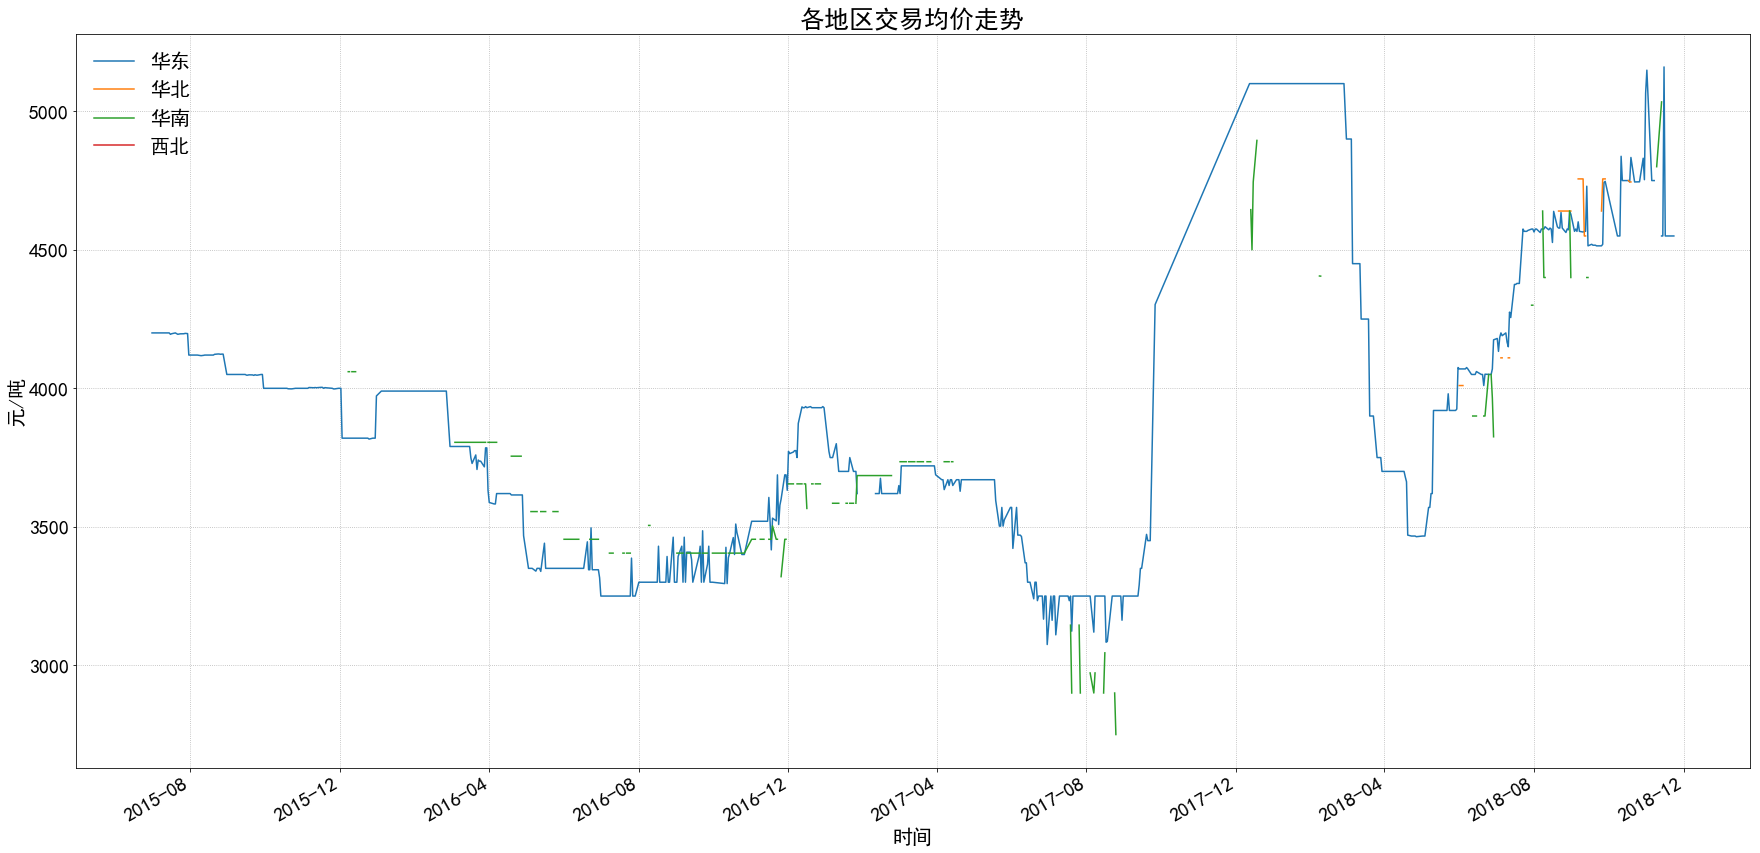

In [6]:
price = data_g.groupby([data_g.index,'cd'])['contprice'].sum()/data_g.groupby([data_g.index,'cd'])['contprice'].count()
prices = price.unstack()
prices.plot(figsize=(30,15))
plt.title('各地区交易均价走势',fontsize=25)
plt.xlabel('时间',fontsize=20)
plt.ylabel('元/吨',fontsize=20)
plt.grid(linestyle=':')
plt.tick_params(labelsize=20)
plt.legend(['华东','华北','华南','西北'],fontsize=20,loc='best',frameon=False)

(-1.1840735955456079,
 1.2089431555283172,
 -1.1478392383057816,
 1.1022780589669168)

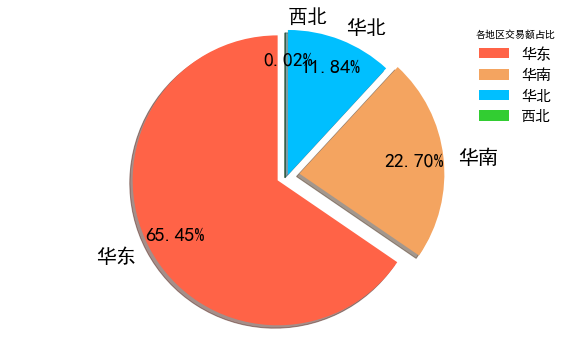

In [7]:
plt.figure(figsize=(10, 6))
data_a = data_g.groupby('cd')['trans-amount'].sum().sort_values(ascending=False)
labels = data_a.rename(index={1:'华东',2:'华北',3:'华南',6:'西北'}).index
colors = ['tomato','sandybrown', 'deepskyblue', 'limegreen']
patches, l_text, p_text = plt.pie(
    data_a,
    labels=labels,
    colors=colors,
    explode=(0.08, 0.08,0,0),
    autopct='%4.2f%%',
    startangle=90,
    shadow=True,
    pctdistance=0.8)

for t in l_text + p_text:
    t.set_size(20)
for t in p_text:
    t.set_color('black')
plt.legend(
    fontsize=15, loc='best', title='各地区交易额占比', frameon=False)
plt.axis('equal')

(-1.2036241951746933,
 1.1496863185016972,
 -1.1764088973485602,
 1.1103510035190158)

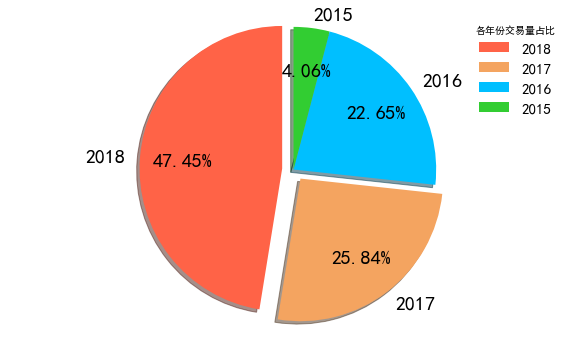

In [8]:
plt.figure(figsize=(10, 6))
data_y_n = data_g.resample('Y')['dealnum'].sum().sort_values(ascending=False)

labels = []
for index in data_y_n.index:
    labels.append(str(index)[:4])

colors = ['tomato','sandybrown', 'deepskyblue', 'limegreen']
patches, l_text, p_text = plt.pie(
    data_y_n,
    labels=labels,
    colors=colors,
    explode=(0.08, 0.08,0,0),
    autopct='%4.2f%%',
    startangle=90,
    shadow=True,
    pctdistance=0.7)

for t in l_text + p_text:
    t.set_size(20)
for t in p_text:
    t.set_color('black')
plt.legend(
    fontsize=15, loc='best', title='各年份交易量占比', frameon=False)
plt.axis('equal')

(-1.1973777916639714,
 1.1884472962736075,
 -1.1241675913535623,
 1.1011508376834467)

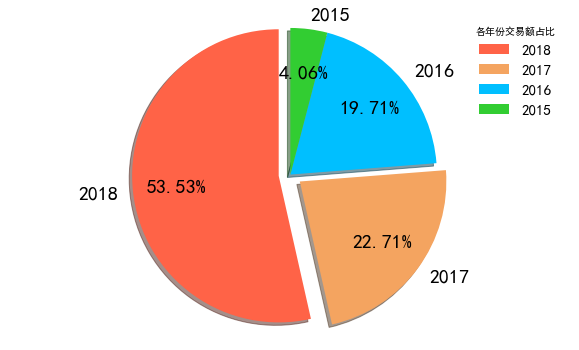

In [9]:
plt.figure(figsize=(10, 6))
data_y_a = data_g.resample('Y')['trans-amount'].sum().sort_values(ascending=False)

labels = []
for index in data_y_a.index:
    labels.append(str(index)[:4])

colors = ['tomato','sandybrown', 'deepskyblue', 'limegreen']
patches, l_text, p_text = plt.pie(
    data_y_a,
    labels=labels,
    colors=colors,
    explode=(0.08, 0.08,0,0),
    autopct='%4.2f%%',
    startangle=90,
    shadow=True,
    pctdistance=0.7)

for t in l_text + p_text:
    t.set_size(20)
for t in p_text:
    t.set_color('black')
plt.legend(
    fontsize=15, loc='best', title='各年份交易额占比', frameon=False)
plt.axis('equal')

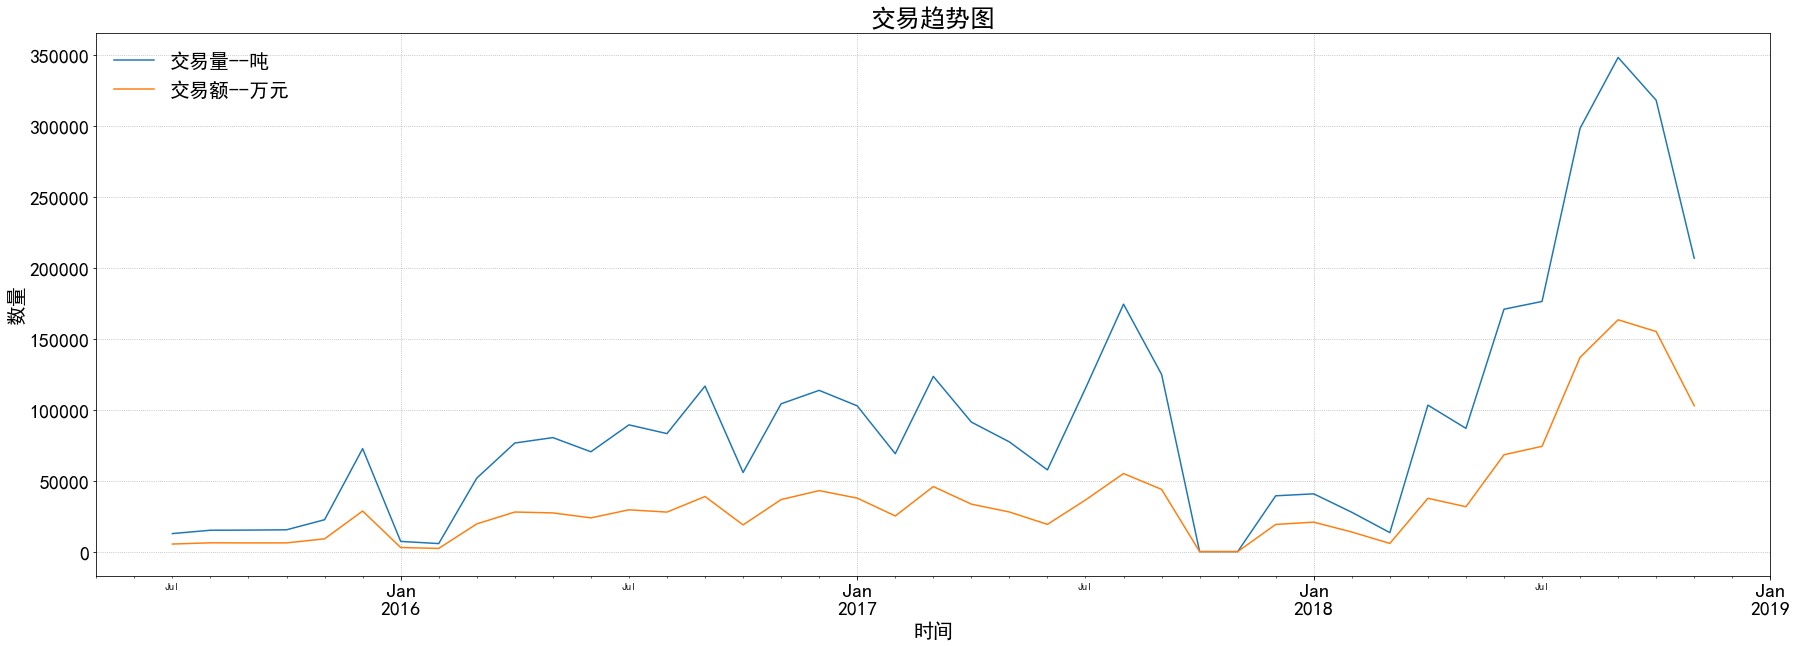

In [10]:
plt.figure(figsize=(30,10))
data_N_A = data_g.resample('M')[['dealnum','trans-amount']].sum()
data_N_A['dealnum'].plot()
(data_N_A['trans-amount']/10000).plot()
plt.title('交易趋势图',fontsize=25)
plt.xlabel('时间',fontsize=20)
plt.ylabel('数量',fontsize=20)
plt.grid(linestyle=':')
plt.tick_params(labelsize=20)
plt.legend(['交易量--吨','交易额--万元'],fontsize=20,loc='best',frameon=False)

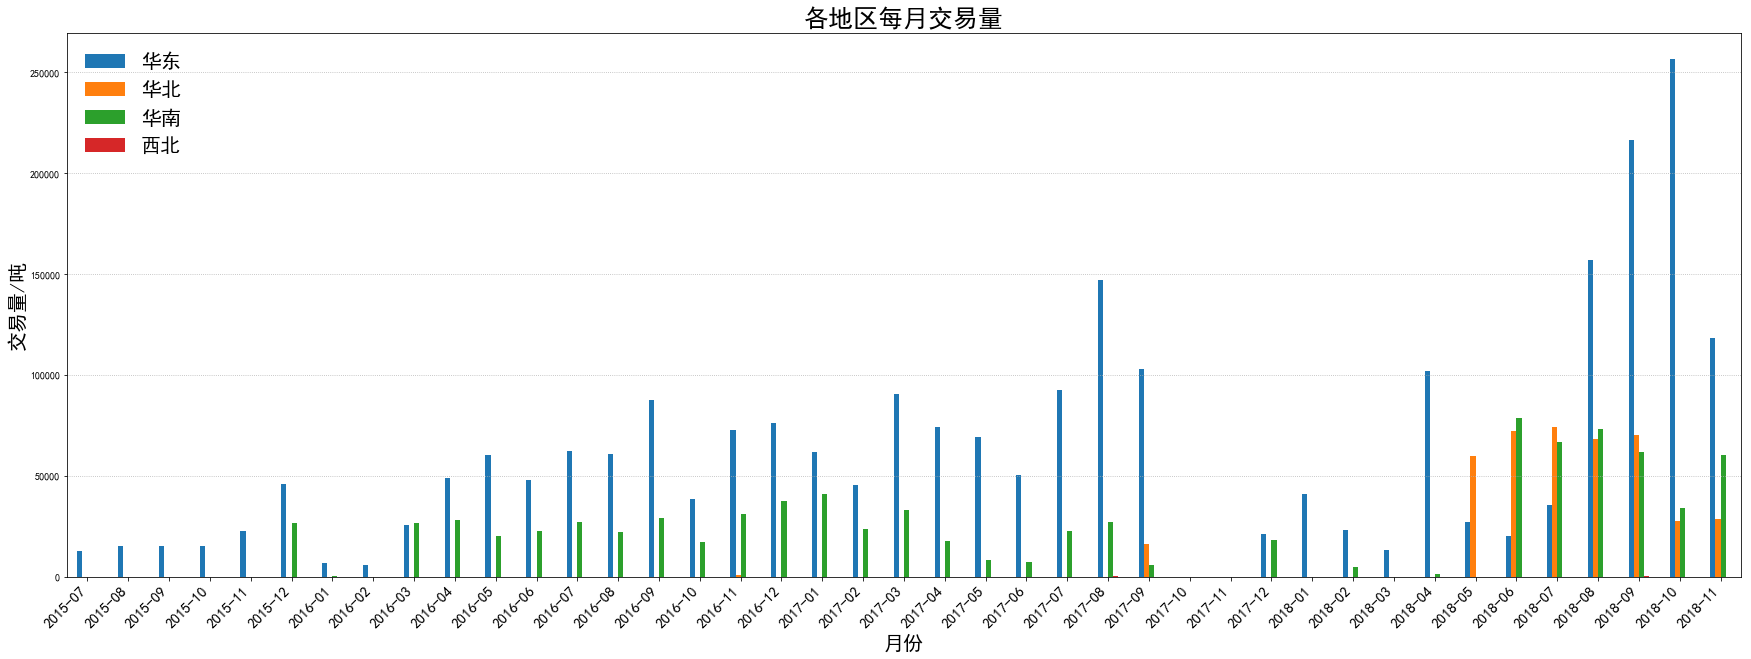

In [11]:
data_1 = data_g[data_g['cd']==1].resample('M')['dealnum'].sum().fillna(0)
data_2 = data_g[data_g['cd']==2].resample('M')['dealnum'].sum().fillna(0)
data_3 = data_g[data_g['cd']==3].resample('M')['dealnum'].sum().fillna(0)
data_6 = data_g[data_g['cd']==6].resample('M')['dealnum'].sum().fillna(0)
data_cd = pd.DataFrame({'华东':data_1,'华北':data_2,'华南':data_3,'西北':data_6})
data_cd.plot.bar(figsize=(30,10))
plt.title('各地区每月交易量',fontsize='25')
plt.xlabel('月份',fontsize=20)
plt.ylabel('交易量/吨',fontsize=20)

data_index = []
for index in data_cd.index:
    data_index.append(str(index)[:7])
data_index
ax = plt.gca()
ax.set_xticklabels(data_index,fontsize=15,rotation=45,horizontalalignment='right')
plt.legend(data_cd.columns,fontsize=20,loc='best',frameon=False)
plt.grid(axis='y',linestyle = ':')


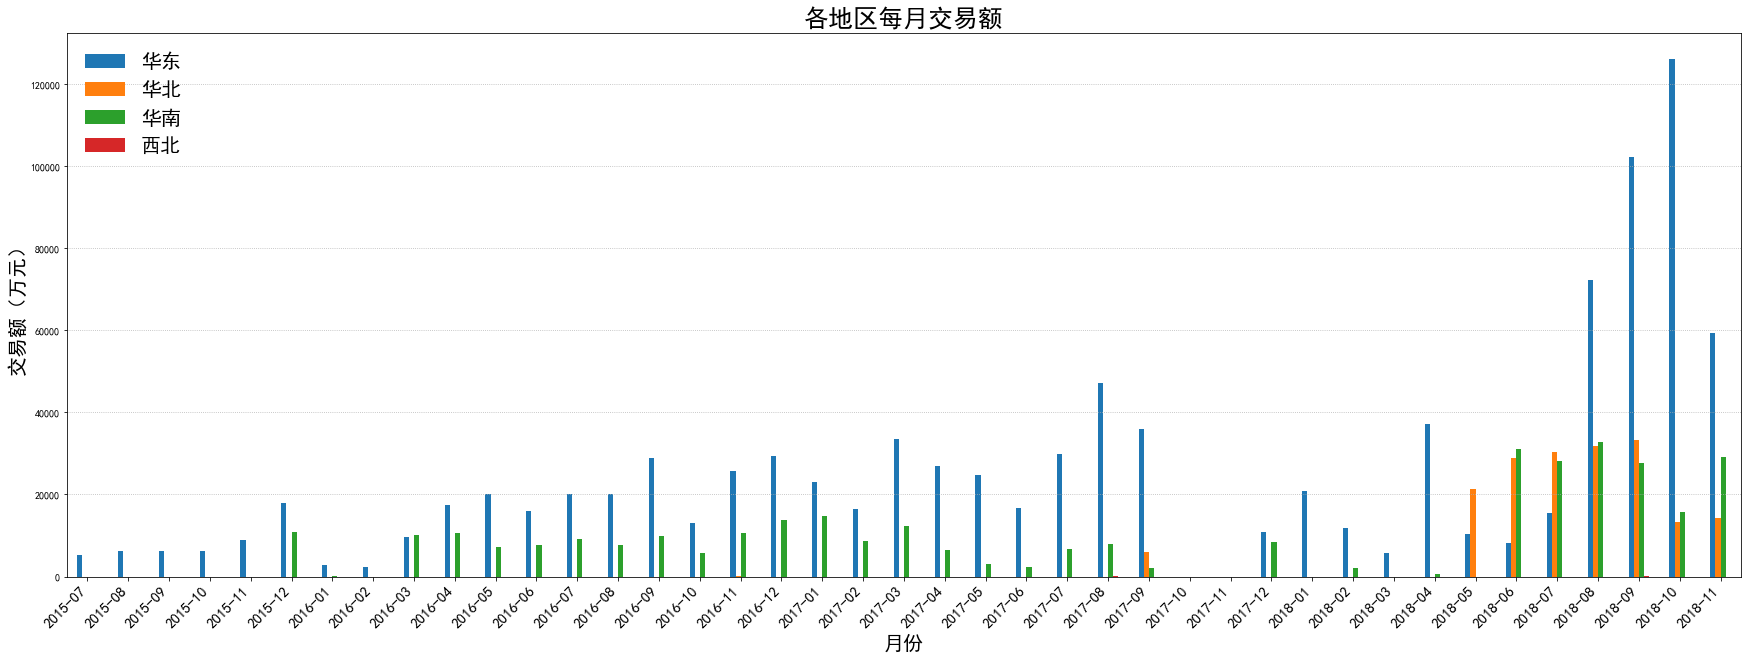

In [12]:
data_1 = data_g[data_g['cd']==1].resample('M')['trans-amount'].sum().fillna(0)/10000
data_2 = data_g[data_g['cd']==2].resample('M')['trans-amount'].sum().fillna(0)/10000
data_3 = data_g[data_g['cd']==3].resample('M')['trans-amount'].sum().fillna(0)/10000
data_6 = data_g[data_g['cd']==6].resample('M')['trans-amount'].sum().fillna(0)/10000
data_cd = pd.DataFrame({'华东':data_1,'华北':data_2,'华南':data_3,'西北':data_6})
data_cd.plot.bar(figsize=(30,10))
plt.title('各地区每月交易额',fontsize='25')
plt.xlabel('月份',fontsize=20)
plt.ylabel('交易额（万元）',fontsize=20)

data_index = []
for index in data_cd.index:
    data_index.append(str(index)[:7])
data_index
ax = plt.gca()
ax.set_xticklabels(data_index,fontsize=15,rotation=45,horizontalalignment='right')
plt.legend(data_cd.columns,fontsize=20,loc='best',frameon=False)
plt.grid(axis='y',linestyle= ':')